#밑바닥부터 시작하는 데이터 과학
###복잡복작의 평범함 발제자 송영숙

데이터 과학 THE DATA SCIENCE VENN DIAGRAM

http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram

<img src="data.png" width="500"><BR>

<img src="a.png" width="500"><BR>

파이썬 다운로드: www.python.org 

아나콘다 다운로드: https://www.continuum.io/downloads

파이참 다운로드: https://pypi.python.org/pypi/pip

pip 다운로드:   https://pypi.python.org/pypi/pip

ipython notebook: https://jupyter.org/

책 참고사이트
https://github.com/Insight-book/data-science-from-scratch/blob/master/links.md

https://github.com/insight-book/data-science-from-scratch


In [47]:
from __future__ import division # 나눈 값이 정수로 나오지 않다록 하는 역할을 한다. 파이썬 3점대에서는 필요없는 한 줄이다.
from matplotlib import pyplot as plt

#1.3 동기부여를 위한 상상: 데이텀 주식회사에 입사했다고 생각하자

##1.3.1 핵심 인물 찾기


다음과 같은 dict 형태에 id와 name이 있는 데이터를 받았다

In [48]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

그리고 id의 쌍으로 구성된 친구 관계 데이터도 있다. 



In [49]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

 <img src="b.png" width="700"><BR>

이제 각 사용자데이터에 해당 사용자의 친구 목록을 추가하고 싶다고 해보자.
그럴 때 먼저 각 사용자의 친구관계(friends) 속성에 빈 list 를 할당한다. 

In [50]:
for user in users:
    user["friends"] = []


그리고 친구관계(friends) 데이터를 이용해 각 list 를 채워 넣는다. 

In [51]:
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # i를 j의 친구로 추가
    users[j]["friends"].append(users[i]) # j를 i의 친구로 추가


이렇게 각 사용자의 친구 목록을 만들면 네트워크 상에서 각 사용자의 평균 연결 수는 몇인가?와 같이 네트워크의 특성에 관한 질문에 답할 수 있다. 이 질문에 답하기 위해 먼저 모든 friends list의 길이를 더해서 총 연결 수를 구해보자. 

In [52]:
def number_of_friends(user):
    """ _user_ 의 친구는 몇 명일까?"""
    return len(user["friends"]) # 각 friends list의 길이

total_connections = sum(number_of_friends(user)
                        for user in users) # 24


이제 단순히 이 숫자를 이용해 사용자의 수로 나누면 된다.

In [53]:
num_users = len(users)
avg_connections = total_connections / num_users # 2.4

다음으로 연결 수가 가장 많은 사람, 즉 친구가 가장 많은 사람이 누군지 알아보자. 사용자의 수가 많지 않으므로 친구가 제일 많은 사람에서 제일 적은 사람 순으로 사용자들을 정열해 보자. 

In [54]:
#(user_id, number_of_friends로 구성된 list 생성)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
sorted(num_friends_by_id, # 정렬해보자
key=lambda (user_user_id, num_friends): num_friends, # num_friends를 기준으로
reverse=True) # 큰 숫자에서 작은 숫자로
# (user_id, num_friends)의 쌍으로 구성되어 있다. 
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

<img src="c.png" width="700"><BR>

#1.3.2 데이터 과학자 추천하기

친구 맺기가 더 활발해 지기 위해 친구추천 기능을 설계해 달라는 요청을 받았다. 친구의 친구의 추천해 주는 것이 좋겠다는 아이디어가 떠 오른다. 각 사용자의 친구에 대한 그 친구의 친구들을 살펴보고 사용자의 모든 친구들에 대해 똑같은 작업을 반복하고 결과를 저장하면 된다. 
foaf == friends_of_friend

In [55]:
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
            for friend in user["friends"] # 유저의 친구 개개인에 대해
            for foaf in friend["friends"]] # 그들의 친구들을 찾아준다



In [56]:
users[0]

{'friends': [{'friends': [{...},
    {'friends': [{...},
      {...},
      {'friends': [{...},
        {...},
        {'friends': [{...},
          {'friends': [{...},
            {'friends': [{...},
              {'friends': [{...},
                {'friends': [{...}, {...}], 'id': 7, 'name': 'Devin'},
                {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
               'id': 8,
               'name': 'Kate'}],
             'id': 6,
             'name': 'Hicks'},
            {'friends': [{...},
              {'friends': [{'friends': [{...}, {...}],
                 'id': 6,
                 'name': 'Hicks'},
                {...},
                {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
               'id': 8,
               'name': 'Kate'}],
             'id': 7,
             'name': 'Devin'}],
           'id': 5,
           'name': 'Clive'}],
         'id': 4,
         'name': 'Thor'}],
       'id': 3,
       'name': 'Chi'}],
     'id': 2,
     'name': 'Sue'},
  

Hero도 자신의 친구의 친구이므로 사용자가 0 (자기자신 포함)이 두 번 포함되어 있다. 그리고 이미 Hero와 친구인 사용자 1과 2도 포함되어 있는 것을 볼 수 있다. Chi(id 3)는 두 명의 친구와 친구이기 때문에 두 번 포함되어 있다. 

In [57]:
print [friend["id"] for friend in users[0]["friends"]] # [1, 2]
print [friend["id"] for friend in users[1]["friends"]] # [0, 2, 3]
print [friend["id"] for friend in users[2]["friends"]] # [0, 1, 3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


사용자들이 이미 여러분의 친구들로 연결되어 있다는 점이 흥미롭다. 그렇다면 이번에는 서로가 함께 하는 친구가 몇 명인지 세어볼까? 동시에 사용자가 이미 아는 사람을 제외하는 함수를 만들자

In [58]:
from collections import Counter # 별도로 import해 주어야 함

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # 사용자의 친구 개개인에 대해
                   for foaf in friend["friends"]  # 그들의 친구들을 세어 보고
                   if not_the_same(user, foaf)    # 그중에서 자신과
                   and not_friends(user, foaf))   # 사용자의 친구가 아닌 사람은 제외

print friends_of_friend_ids(users[3]) # Counter({0: 2, 5: 1})


Counter({0: 2, 5: 1})


이제 Chi(id: 3)는 Hero(id: 0)와 함께 아는 친구가 두 명이고 Chive(id: 5)와 함께 아는 친구가 한 명이라는 것을 알 수 있다.


데이터를 꾸준히 보다 보니 데이터 과학자의 직감에 따라 비슷한 관심사를 가지 ㄴ사람을 소개 받으면 기분이 좋을 것 같다는 생각이 든다.(도메인 전문성) 당신은 주변 직원 몇 명에게 물어 보고 나서 관심사 데이터(interests)를 손에 넣었다. 이 데이터는 사용자 고유 번호 id와 관심사(interest)의 쌍으로 구성되어 있다.

In [59]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


예를 들어 Hero(id:0)와 Kate(id: 8)는 함께 아는 친구가 한 명도 없지만 빅테이터라는 공통된 관심사를 갖고 있다. 
특정 관심사를 공유하는 사용자들을 찾아 주는 함수를 만드는 것도 그리 어렵지 않다.

In [60]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]


그러나 이 코드는 호출할 때마다 관심사 데이터를 매번 처음부터 끝까지 훑어야 한다는 단점이 있다. 사용자 수가 많고 그들의 관심사가 많다면(또는 데이터를 여러 번 훑을거라면) 각 관심사에 대한 사용자 인텍스를 만드는 것이 나을지 모른다. 

In [61]:
from collections import defaultdict

# keys가 interests, values가 사용자 id
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys가 사용자 ids, values가 관심사
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)


이제 특정한 사용자가 주어졌을 때 사용자와 가장 유사한 관심사를 가진 사람이 누구인지 다음의 3단계로 알 수 있다. 

-해당 사용자의 관심사들을 훑는다.
-각 관심사를 가진 다른 사용자들이 누구인지 찾아본다.
-다른 사용자들이 몇 번이나 등장하는지 센다.

In [62]:

def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user["user_id"]
        for interested_user_id in users_by_interest[interest]
        if interested_user_id != user_id)


함께 아는 친구와 공통된 관심사 정보를 동시에 이용하면 데이터 과학자 추천 시스템의 성능을 더욱 높을 수 있을 것이다. 

1.3.3. 연봉과 경력

연봉과 근속기간 시각화 

In [64]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

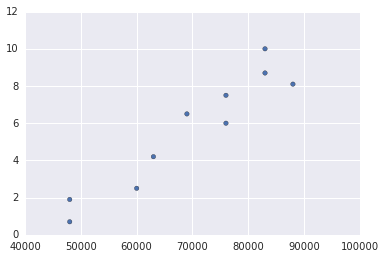

In [69]:
x,y = zip(*salaries_and_tenures)
plt.scatter(x,y)

감사합니다. 

마크다운 팁: 표 만들기 http://www.tablesgenerator.com/markdown_tables
파이썬 한글처리: http://amornatura.tistory.com/104